# About Dataset Climate Data Daily


Daily climate data that cover almost all region in Indonesia from 2010 to 2020.

**Features**:


* **Tn**: min temperature (°C)
* **Tx**:	max temperature (°C)
* **Tavg**:	avg temperature (°C)
* **RH_avg**:	avg humidity (%)
* **RR**:	rainfall (mm)
* **ss**:	duration of sunshine (hour)
* **ff_x**:	max wind speed (m/s)
* **ddd_x**:	wind direction at maximum speed (°)
* **ff_avg**:	avg wind speed (m/s)
* **ddd_car**:	most wind direction (°)
* **station_id**:	station id which record the data. Detail of the station can be found in station_detail.csv




# **Import Library**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import branca
import time
from IPython.display import display, clear_output

import pandas as pd
pd.set_option ('display.max_columns', None)

# **Load and Process the dataset**

## **Function**

In [4]:
def load_data(path):
    """Load dataset, standardize column names, and check missing values."""
    df = pd.read_csv(path)

    # Ensure column names are consistent across datasets
    df.columns = df.columns.str.lower()

    print(f"Shape: {df.shape}, Columns: {list(df.columns)}")

    return df


In [5]:
def check_unique_values(df):
    """
    Check the number of unique values and list them for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        pd.DataFrame: A DataFrame displaying the count and list of unique values for each column.
    """
    unique_info = [[col, df[col].nunique(), df[col].unique()] for col in df.columns]

    # Convert to DataFrame
    result_df = pd.DataFrame(unique_info, columns=['Feature', 'Unique Count', 'Unique Values'])

    return result_df

## **Load Data**

### **province_detail.csv**

In [6]:
province_detail = '/content/drive/MyDrive/Projects/data visua/province_detail.csv'
df_province = load_data(province_detail)

Shape: (34, 2), Columns: ['province_id', 'province_name']


In [7]:
df_province.head(5)

,province_id,province_name
0,1,Nanggroe Aceh Darussalam
1,2,Sumatera Utara
2,3,Sumatera Barat
3,4,Riau
4,5,Jambi


### **station_detail.csv**

In [8]:
station_detail = '/content/drive/MyDrive/Projects/data visua/station_detail.csv'
df_station = load_data(station_detail)

Shape: (192, 7), Columns: ['station_id', 'station_name', 'region_name', 'latitude', 'longitude', 'region_id', 'province_id']


In [9]:
df_station.head(5)

,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,96003,Balai Besar Meteorologi Klimatologi dan Geofi...,Kab. Badung,-8.73810,115.17860,272,17
2,96004,Balai Besar Meteorologi Klimatologi dan Geofis...,Kota Makassar,-5.14283,119.45227,412,26
3,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
4,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1


### **climate_data.csv**

In [10]:
climate_data ='/content/drive/MyDrive/Projects/data visua/climate_data.csv'
df_climate = load_data(climate_data)

Shape: (589265, 12), Columns: ['date', 'tn', 'tx', 'tavg', 'rh_avg', 'rr', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car', 'station_id']


In [11]:
df_climate.head(5)

,date,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


# **merge 3 csv**


In [12]:
df_merg = df_station.merge(df_province, on=["province_id"], how='left')
df_merg_last = df_climate.merge(df_merg, on=["station_id"], how='left')
df = df_merg_last.copy()

In [13]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")

In [14]:
# Extract month and year for grouping
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [15]:
df.head(5)

,date,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id,province_name,day,month,year
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,1,1,2010
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,2,1,2010
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,3,1,2010
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,4,1,2010
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,5,1,2010


In [16]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    "Column": df.columns,
    "Missing Count": missing_values.values,
    "Missing Percentage": missing_percentage.values
})

missing_df = missing_df[missing_df["Missing Count"] > 0].reset_index(drop=True)
display(missing_df)

,Column,Missing Count,Missing Percentage
0,tn,23383,3.968164
1,tx,37736,6.403910
2,tavg,45105,7.654451
3,rh_avg,48182,8.176627
4,rr,125384,21.278033
5,ss,43721,7.419582
6,ff_x,10214,1.733346
7,ddd_x,13128,2.227860
8,ff_avg,10127,1.718582
9,ddd_car,13739,2.331549


In [17]:
df["tavg"].fillna(df["tavg"].mean(), inplace=True)
df["rr"].fillna(df["rr"].median(), inplace=True)

<ipython-input-17-9d1ab8a69ba1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["tavg"].fillna(df["tavg"].mean(), inplace=True)
<ipython-input-17-9d1ab8a69ba1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# **EAD**

## **Describe and Process The Dataset**

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,589265,2015-08-09 23:46:38.410222592,2010-01-01 00:00:00,2012-08-27 00:00:00,2015-10-23 00:00:00,2018-06-09 00:00:00,2020-12-31 00:00:00,NaN
tn,565882.0,23.312111,0.0,23.0,24.0,25.0,246.0,2.280687
tx,551529.0,31.528955,0.0,30.5,31.8,33.0,334.0,2.311659
tavg,589265.0,26.855475,0.0,26.3,27.0,27.9,141.6,1.863944
rh_avg,541083.0,82.489365,24.0,79.0,83.0,87.0,7520.0,14.337669
rr,589265.0,7.046445,-1.0,0.0,1.0,5.8,1965.5,16.214984
ss,545544.0,5.083199,0.0,2.5,5.3,7.6,705.0,3.261586
ff_x,579051.0,4.709601,0.0,3.0,4.0,6.0,185.0,2.612285
ddd_x,576137.0,188.488325,0.0,90.0,180.0,270.0,931.0,107.657452
ff_avg,579138.0,1.95668,0.0,1.0,2.0,3.0,160.0,1.803358


In [19]:
df['tavg'].nlargest(5)

,tavg
271470,141.6
127865,141.5
202933,35.2
39721,34.5
253186,34.3


In [20]:
# drop wrong nlargest 2 value
df.drop(df['tavg'].nlargest(2).index, axis=0, inplace=True)

In [21]:
df['rr'].nlargest(10)

,rr
357063,1965.5
357062,1460.5
357045,1442.0
357060,1142.0
83847,470.0
273653,397.4
85021,378.0
84935,370.3
318492,364.1
553107,360.0


In [22]:
# drop wrong nlargest 4 value
df.drop(df['rr'].nlargest(4).index, axis=0, inplace=True)

In [23]:
df['ss'].nlargest(10)

,ss
347544,705.0
588501,303.0
300295,103.0
299764,99.0
299712,95.0
587646,95.0
299612,91.0
299731,91.0
309885,88.0
299614,79.0


In [24]:
# drop wrong nlargest 2 value
df.drop(df['ss'].nlargest(2).index, axis=0, inplace=True)

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
# Created new columnb with Max Min Temp (Tx,Tn)
df["diff_temp"] = df["tx"] - df["tn"]

## **Average Rain Mountly**

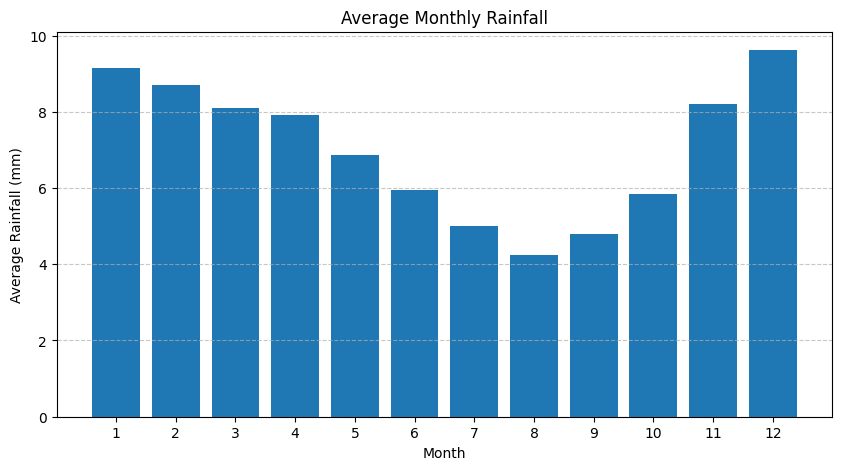

In [27]:
# Calculate average rainfall per month
monthly_rainfall = df.groupby('month')['rr'].mean()

# Plot the monthly average rainfall
plt.figure(figsize=(10, 5))
plt.bar(monthly_rainfall.index, monthly_rainfall.values)
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Monthly Rainfall')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- The highest rainfall occurs in January and December (~11-12mm), indicating that the rainy season is concentrated in the beginning and end of the year.
- The dry season occurs in July - September, with the lowest rainfall in August (~5mm).
- Rainfall decreases gradually from March - June and increases sharply from October onwards, reflecting a distinct dry - rainy season cycle.

## **Average Rain Yearly 2010-2020**

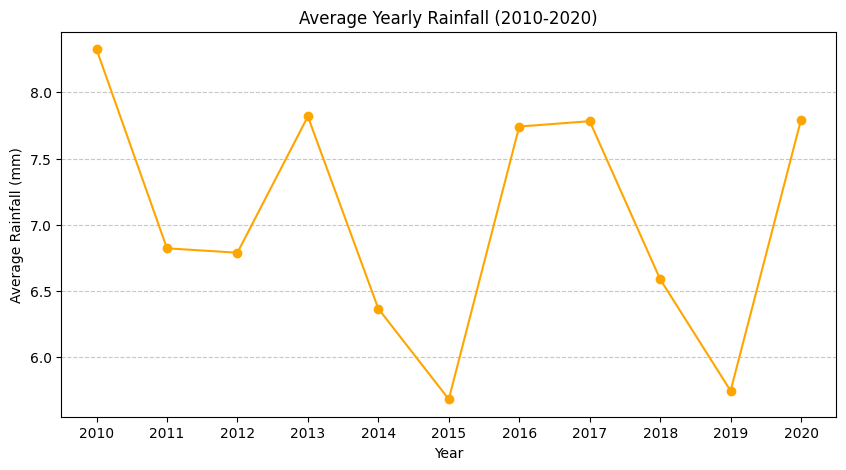

In [28]:
# # Filter data for the range 2010-2020
df_filtered = df[(df['year'] >= 2010) & (df['year'] <= 2020)]

# Calculate average rainfall per year
yearly_rainfall = df_filtered.groupby('year')['rr'].mean()

# Plot the yearly average rainfall
plt.figure(figsize=(10, 5))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Yearly Rainfall (2010-2020)')
plt.xticks(range(2010, 2021))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Rainfall fluctuates strongly from year to year, with no stable trend.
- 2016-2017 peaked (~10.5mm), the highest in this period, possibly due to the influence of climate phenomena such as El Niño or La Niña.
- 2019 had the lowest rainfall (~7mm), marking a severe drought.
- 2020 saw a significant recovery in rainfall, a sharp increase compared to 2019.

## **Average Temperature Yearly 2015-2020**

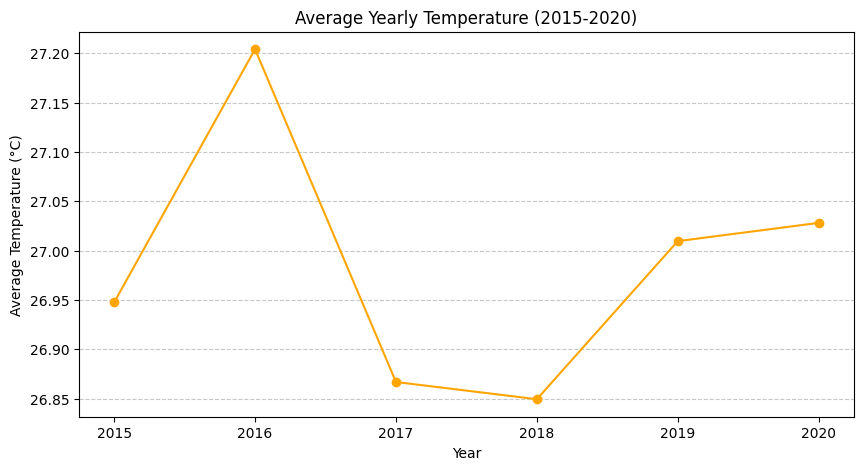

In [29]:
# Filter data for the range 2015-2020
df_filtered = df[(df['year'] >= 2015) & (df['year'] <= 2020)]

# Calculate average temperature per year
yearly_average_temp = df_filtered.groupby('year')['tavg'].mean()  # Calculate average temperature, not rainfall

# Plot the yearly average temperature
plt.figure(figsize=(10, 5))
plt.plot(yearly_average_temp.index, yearly_average_temp.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')  # Changed y-axis label to reflect temperature
plt.title('Average Yearly Temperature (2015-2020)') # Changed title to reflect temperature
plt.xticks(range(2015, 2021))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Top 5 Avg. Most Rainly Province

In [30]:
df.groupby(["province_name"])['rr'].mean(numeric_only=True).sort_values(ascending=False)[:5]

,rr
province_name,
Sumatera Barat,11.608054
Kalimantan Barat,9.299038
Sulawesi Selatan,9.185316
Bengkulu,8.843054
Papua,8.720628


## Top 5 Avg. High Temp Province

In [31]:
df.groupby(["province_name"])['tavg'].mean(numeric_only=True).sort_values(ascending=False)[:5]

,tavg
province_name,
DKI Jakarta,28.272412
Jawa Tengah,27.793721
Sulawesi Barat,27.680863
Banten,27.514750
Kep. Riau,27.496218


# **Creating Maps & Visualizing Geospatial Data**

In [32]:
# Aggregate climate data by province
df_province_avg = df.groupby(["province_name"], as_index=False).agg({
    "tavg": "mean",  # Average temperature
    "rr": "mean",    # Average rainfall
    "latitude": "mean",  # Average latitude (if multiple stations exist in a province)
    "longitude": "mean"  # Average longitude
})

In [33]:
# Round temperature values for consistency
df_province_avg["tavg"] = df_province_avg["tavg"].round(2)
df_province_avg["rr"] = df_province_avg["rr"].round(2)

In [34]:
# Define a stepped color scale for temperature
min_temp = df_province_avg["tavg"].min()
max_temp = df_province_avg["tavg"].max()

In [35]:
colormap = branca.colormap.StepColormap(
    colors=['purple', 'blue', 'green', 'yellow', 'orange', 'red'],
    vmin=min_temp,
    vmax=max_temp,
    index=(10,15,20,25,28),
    caption="Average Temperature (°C)"
)

In [36]:
# Indonesia
latitude = -5
longitude = 120

In [37]:
m = folium.Map(location=[latitude, longitude], zoom_start=6)

# Add temperature markers for each province
for index, row in df_province_avg.iterrows():
    color = colormap(row["tavg"])  # Assign color based on temperature

    popup_text = (f"<b>Province:</b> {row['province_name']}<br>"
                  f"<b>Avg Temp:</b> {row['tavg']}°C<br>"
                  f"<b>Avg Rainfall:</b> {row['rr']}mm")

    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=row["province_name"]
    ).add_to(m)

In [38]:
# m

# Realtime

In [ ]:
start_date = df["date"].min()

for i in range(10000):
    clear_output(wait=True)

    current_date = start_date + pd.Timedelta(days=i)
    df_current = df[df["date"] == current_date]

    if df_current.empty:
        continue

    center_lat, center_lon = df_current["latitude"].mean(), df_current["longitude"].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

    for _, row in df_current.iterrows():
        popup_text = f"""
        <b>Province:</b> {row['province_name']}<br>
        <b>Station:</b> {row['station_name']}<br>
        <b>Date:</b> {row['date'].strftime('%Y-%m-%d')}<br>
        <b>Avg Temp:</b> {row['tavg']}°C<br>
        <b>Avg Rainfall:</b> {row['rr']}mm
        """
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=8,
            color="red" if row["tavg"] > 30 else "blue",
            fill=True,
            fill_color="red" if row["tavg"] > 30 else "blue",
            fill_opacity=0.7,
            popup=folium.Popup(popup_text, max_width=300),
            tooltip=row["province_name"]
        ).add_to(m)

    display(m)
    print(f"Showing data for: {current_date.strftime('%Y-%m-%d')}")
    time.sleep(10)


Showing data for: 2010-01-03
